In [1]:
from Dataset import *
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline

Using TensorFlow backend.


4 datasets are imported. These datasets have labeled tweets collected during disasters. The binary label is relatedness to the disaster. Colrado wildfire 2012 (col_fire_12) is used as the dataset to train the logistic regression model and the rest 3 are used as datasets to evaluate the performance of the model. We would like to see whether a machine learning model trained on 1 disaster is good at labeling tweets during other disastrous events.

In [4]:
col_fire_12 = dataset('2012_Colorado_wildfires/2012_Colorado_wildfires-tweets_labeled.csv')
col_flood_13 = dataset('2013_Colorado_floods/2013_Colorado_floods-tweets_labeled.csv')
aus_fire_13 = dataset('2013_Australia_bushfire/2013_Australia_bushfire-tweets_labeled.csv')
aus_flood_13 = dataset('2013_Queensland_floods/2013_Queensland_floods-tweets_labeled.csv')
x_col_fire = col_fire_12.hashing_vectorizer()  # train dataset
x_col_flood = col_flood_13.hashing_vectorizer()
x_aus_fire = aus_fire_13.hashing_vectorizer()
x_aus_flood = aus_flood_13.hashing_vectorizer()
y_col_fire = col_fire_12.df.label  # train label
y_col_flood = col_flood_13.df.label
y_aus_fire = aus_fire_13.df.label
y_aus_flood = aus_flood_13.df.label

Set up logistic regression, our baseline machine learning model.

In [10]:
lr = LogisticRegression()
print cross_val_score(lr, x_col_fire, y_col_fire, cv=5)
print "The accuracy of the model on train dataset is {}".format(sum(cross_val_score(lr, x_col_fire, y_col_fire, cv=5))/5)

[ 0.85267857  0.81696429  0.80269058  0.82511211  0.80717489]
The accuracy of the model on train datset is 0.820924087124


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_col_fire, y_col_fire, test_size=0.3)
lr = LogisticRegression()
lr.fit(x_train, y_train)
print lr.score(x_train, y_train)
print lr.score(x_test, y_test)

0.8847631242
0.839285714286


The test size is 0.3. Accuracy on train data is 0.88 and accuracy on test data is 0.84, which is desired. There is no overfitting and accuracy score is reasonable with respect to cv score.

In [34]:
y_pred1 = lr.predict(x_col_flood)
y_pred2 = lr.predict(x_aus_fire)
y_pred3 = lr.predict(x_aus_flood)
accuracy1 = metrics.accuracy_score(y_col_flood, y_pred1)
accuracy2 = metrics.accuracy_score(y_aus_fire, y_pred2)
accuracy3 = metrics.accuracy_score(y_aus_flood, y_pred3)

In [42]:
print 'accuracy on Colrado flood 2013 is {}'.format(accuracy1)
print 'accuracy on Australia fire 2013 is {}'.format(accuracy2)
print 'accuracy on Australia flood 2013 is {}'.format(accuracy3)

accuracy on Colrado flood 2013 is 0.413304252999
accuracy on Australia fire 2013 is 0.656163113994
accuracy on Australia flood 2013 is 0.597122302158


In [40]:
precision1 = metrics.precision_score(y_col_flood, y_pred1)
precision2 = metrics.precision_score(y_aus_fire, y_pred2)
precision3 = metrics.precision_score(y_aus_flood, y_pred3)
print 'precision on Colrado flood 2013 is {}'.format(precision1)
print 'precision on Australia fire 2013 is {}'.format(precision2)
print 'precision on Australia flood 2013 is {}'.format(precision3)

precision on Colrado flood 2013 is 0.892307692308
precision on Australia fire 2013 is 0.658002735978
precision on Australia flood 2013 is 0.85342019544


In [43]:
recall1 = metrics.recall_score(y_col_flood, y_pred1)
recall2 = metrics.recall_score(y_aus_fire, y_pred2)
recall3 = metrics.recall_score(y_aus_flood, y_pred3)
print 'recall on Colrado flood 2013 is {}'.format(recall1)
print 'recall on Australia fire 2013 is {}'.format(recall2)
print 'recall on Australia flood 2013 is {}'.format(recall3)

recall on Colrado flood 2013 is 0.251808972504
recall on Australia fire 2013 is 0.799003322259
recall on Australia flood 2013 is 0.393984962406


In [44]:
f11 = metrics.f1_score(y_col_flood, y_pred1)
f12 = metrics.f1_score(y_aus_fire, y_pred2)
f13 = metrics.f1_score(y_aus_flood, y_pred3)
print 'f1-score on Colrado flood 2013 is {}'.format(f11)
print 'f1-score on Australia fire 2013 is {}'.format(f12)
print 'f1-score on Australia flood 2013 is {}'.format(f13)

f1-score on Colrado flood 2013 is 0.392776523702
f1-score on Australia fire 2013 is 0.721680420105
f1-score on Australia flood 2013 is 0.539094650206


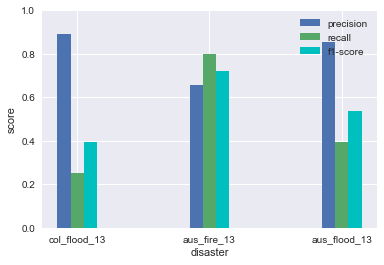

In [64]:
import seaborn as sns
sns.set()
plt.bar([0.9,1.9,2.9], [precision1,precision2,precision3], width=0.1, label='precision')
plt.bar([1,2,3], [recall1,recall2,recall3], width=0.1, label='recall')
plt.bar([1.1,2.1,3.1], [f11,f12,f13], width=0.1, label='f1-score', color='c')
plt.xticks([1,2,3], ['col_flood_13', 'aus_fire_13', 'aus_flood_13'])
plt.ylim([0,1])
plt.legend(loc='best')
plt.xlabel('disaster')
plt.ylabel('score')
plt.show()